In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 解題步驟：

1. 讀取 titanic.csv
2. 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')
3. 分析缺失值，練習繪製直方圖(如下圖二)
4. 分別以平均值及眾數填補
5. 將剩下是字串的欄位轉為數值(Age and Embarked)
6. 將資料切分為訓練及測試集
7. 輸入隨機森林訓練並測試模型在訓練及測試集上的準確度

#### 圖一
<img src="./data/titanic.png" style="zoom:30%;" />

#### 圖二
<img src="./data/hist.png" style="zoom:100%;" />

## 讀取資料

In [95]:
""" Your code here: 讀取 titanic.csv """
train=pd.read_csv("./hw_04/titanic.csv")

In [96]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')

In [97]:
""" Your code here: """
train=train.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
discrete =train.columns[ train.dtypes==object]
continual = train.columns[ ~(train.dtypes==object)]

## 填補缺失值
1. Discrete: 繪製圖表以判斷該如何填補
2. Continual: 使用平均值或中位數
3. 若缺失值過多則刪除

<AxesSubplot:>

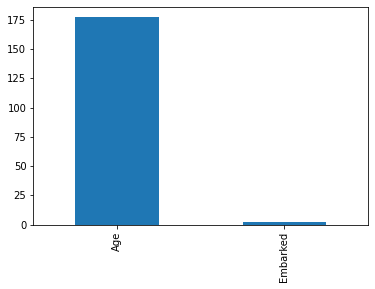

In [98]:
""" Your code here: """
miss=train.isnull().sum()
miss[miss>0].plot.bar()

In [99]:
for i  ,col in zip(miss[miss>0],miss[miss>0].index):
    if col in discrete:
        print(f"{col}is discrete. Missing is {i/train.shape[0]:.4%} ")
    else:
        print(f"{col}is continual. Missing is {i/train.shape[0]:.4%} ")
        

Ageis continual. Missing is 19.8653% 
Embarkedis discrete. Missing is 0.2245% 


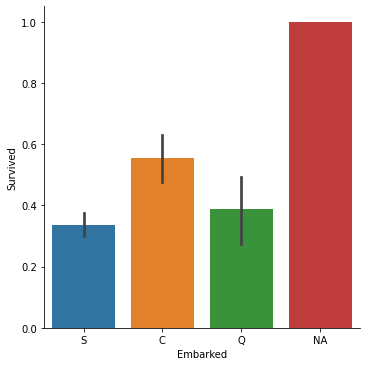

In [100]:
discrete_train = train.copy()
discrete_train.Embarked=discrete_train.Embarked.fillna("NA")
sns.catplot(data=discrete_train , kind ="bar" ,x ="Embarked" , y="Survived")

缺失的部分都是有存活的，所以填入C，C的存活率是最高的

存活率的依序是 C >> Q >> S

In [101]:
train.Embarked = train.Embarked.fillna("C")

In [102]:
train["Survived"]==0

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Survived, Length: 891, dtype: bool

<AxesSubplot:title={'center':'fillna_mean'}, xlabel='Age', ylabel='Probability'>

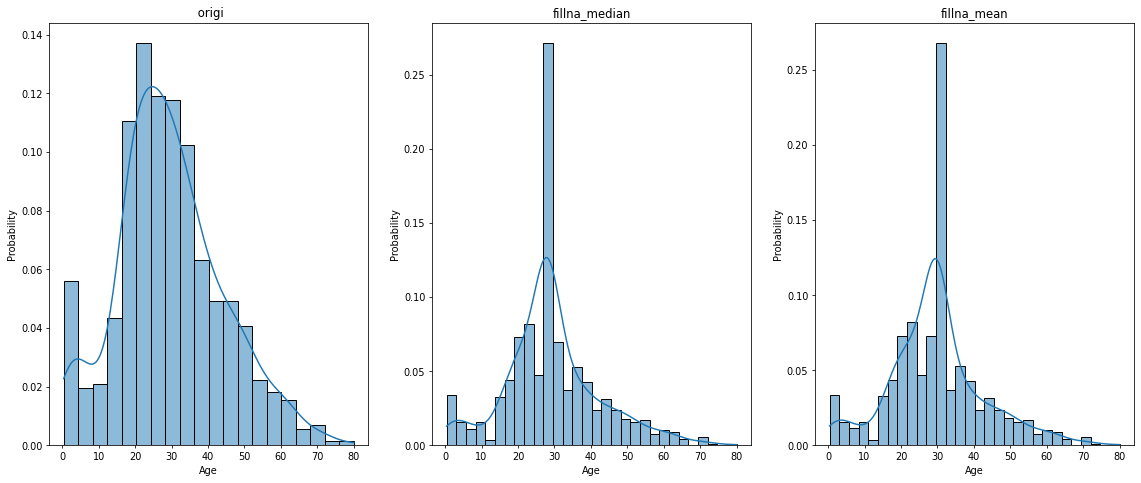

In [103]:
plt.figure(figsize = (20, 8), dpi = 70)
plt.subplot(1, 3, 1, title = ' origi')
sns.histplot(train.Age, kde = True, stat = 'probability', element = 'bars',)
plt.subplot(1, 3, 2, title = 'fillna_median')
sns.histplot(train.Age.fillna(train.Age.median()), kde = True, stat = 'probability', element = 'bars',)
plt.subplot(1, 3, 3, title = 'fillna_mean')
sns.histplot(train.Age.fillna(train.Age.mean()), kde = True, stat = 'probability', element = 'bars',)

中位數填補跟平均數填補，都無太大的差異

<AxesSubplot:title={'center':'fillna_mean_1'}, xlabel='Age', ylabel='Probability'>

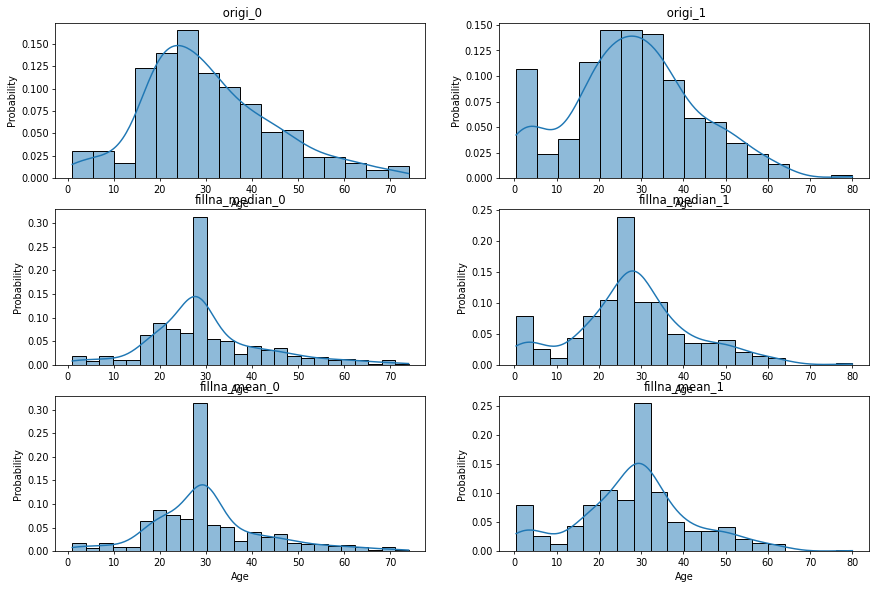

In [104]:
plt.figure(figsize = (15, 10), dpi = 70)
plt.subplot(3, 2, 1, title = ' origi_0')
sns.histplot(train.Age[train["Survived"]==0], kde = True, stat = 'probability', element = 'bars',)
plt.subplot(3, 2, 2, title = ' origi_1')
sns.histplot(train.Age[train["Survived"]==1], kde = True, stat = 'probability', element = 'bars',)
plt.subplot(3, 2 ,3, title = 'fillna_median_0')
sns.histplot(train.Age.fillna(train.Age.median())[train["Survived"]==0], kde = True, stat = 'probability', element = 'bars',)
plt.subplot(3, 2 ,4, title = 'fillna_median_1')
sns.histplot(train.Age.fillna(train.Age.median())[train["Survived"]==1], kde = True, stat = 'probability', element = 'bars',)
plt.subplot(3, 2, 5, title = 'fillna_mean_0')
sns.histplot(train.Age.fillna(train.Age.mean())[train["Survived"]==0], kde = True, stat = 'probability', element = 'bars',)
plt.subplot(3, 2, 6, title = 'fillna_mean_1')
sns.histplot(train.Age.fillna(train.Age.mean())[train["Survived"]==1], kde = True, stat = 'probability', element = 'bars',)

以中位數的方式做填補

In [130]:
stats.spearmanr(train.Age.fillna(train.Age.mean()) ,train.Age ,nan_policy = 'omit')

SpearmanrResult(correlation=0.9999999999999998, pvalue=0.0)

In [131]:
import scipy
scipy.stats.entropy(train.Age.fillna(train.Age.median()) ,train.Age)
#越小，相識度越高

0.0

In [106]:
train.Age=train.Age.fillna(train.Age.mean())

## Feature transformation(Sex and Embarked)
- Label encoding
- One-hot encoding

In [107]:
""" Your code here: """
train.Sex=train.Sex.map(lambda x : 0 if x =="male"  else 1)


In [108]:
ohe=pd.get_dummies(train.Embarked)
train = pd.concat([train , ohe],axis=1)
train.drop(columns="Embarked",inplace=True)

In [119]:
train.iloc[:,1:]

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,3,1,29.699118,1,2,23.4500,0,0,1
889,1,0,26.000000,0,0,30.0000,1,0,0


## 切分訓練集及測試集

In [123]:
""" Your code here: """
x_train, x_test, y_train, y_test = train_test_split(train.iloc[:,1:] ,train.Survived ,random_state=3 ,train_size=0.7)

## Training

In [124]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

## Evaluation

In [125]:
print('Training report')
pred = RF.predict(x_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(x_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       385
           1       0.99      0.97      0.98       238

    accuracy                           0.99       623
   macro avg       0.99      0.98      0.98       623
weighted avg       0.99      0.99      0.99       623


Testing report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       164
           1       0.71      0.75      0.73       104

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.78      0.78       268

